In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data
boston = pd.read_csv('boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


 ## Check null and duplicates

In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
boston.duplicated().sum()

0

Data clearing is done ! no null data and there is no duplicates

In [5]:
# split train test
from sklearn.model_selection import train_test_split

feature = boston.drop(columns='medv')
target = boston[['medv']]

feature_boston_train, feature_boston_test, target_boston_train, target_boston_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [6]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_boston_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.713187
2,zn,2.465631
3,indus,3.877855
4,chas,1.096674
5,nox,4.469150
6,rm,1.947809
7,age,2.989948
8,dis,4.168578
9,rad,7.658316
10,tax,8.943301


There are several features with high VIF scores:
1. `nox`
2. `dis`
3. `rad`
4. `tax`

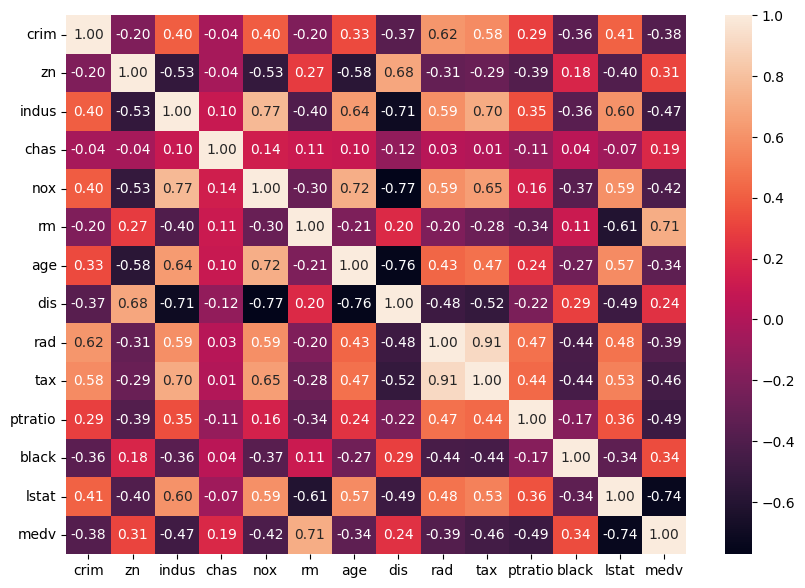

In [7]:
# heatmap correlation
boston_train = pd.concat([feature_boston_train, target_boston_train], axis=1)
corr = boston_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

We will see how the correlation between features that have VIF > 4, either against the target variable or with fellow features. Also, look at the correlation with other features. In the heatmap above, the correlation is considered high if it has a value > 0.7.

After noticing, among the 4 features with VIF > 4, `tax` has the highest correlation with the target variable, so we will keep `tax`. Another feature that has high correlation with other features is `indus`. `indus` has high correlation with `tax`, `dis`, and `nox`, so `indus` will be dropped.

We choose to retain `tax` and `dis`. Therefore, we need to drop:

* `indus`
* `nox`
* `rad`

In [8]:
# drop redundant features
feature_boston_train = feature_boston_train.drop(columns=['indus','nox','rad'])
feature_boston_test = feature_boston_test.drop(columns=['indus','nox','rad'])

## Recheck VIF



In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_boston_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.575252
2,zn,2.363346
3,chas,1.062361
4,rm,1.798318
5,age,2.780238
6,dis,3.586339
7,tax,2.381965
8,ptratio,1.578882
9,black,1.308853
10,lstat,2.742745


No VIF > 4, Good !

# Model Training
### Ridge Regression

In [10]:
from sklearn.linear_model import Ridge

# train the model
X_admit_train = feature_boston_train.to_numpy()
y_admit_train = target_boston_train.to_numpy()
y_admit_train = y_admit_train.reshape(len(y_admit_train),)

# define the model
ridge_reg = Ridge(alpha=0.1,
                  random_state=42)

ridge_reg.fit(X_admit_train, y_admit_train)

Ridge(alpha=0.1, random_state=42)

In [11]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_boston_train
model = ridge_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,12.471125
1,crim,-0.072642
2,zn,0.029370
3,chas,2.665203
4,rm,4.934213
5,age,-0.023974
6,dis,-1.134713
7,tax,-0.003351
8,ptratio,-0.636844
9,black,0.012525


### Lasso

In [12]:
from sklearn.linear_model import Lasso

# define the model
lasso_reg = Lasso(alpha=0.1,
                  random_state=42)

lasso_reg.fit(X_admit_train, y_admit_train)

Lasso(alpha=0.1, random_state=42)

In [13]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_boston_train
model = lasso_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,14.388124
1,crim,-0.072414
2,zn,0.028873
3,chas,1.167327
4,rm,4.655845
5,age,-0.018457
6,dis,-1.098853
7,tax,-0.003180
8,ptratio,-0.652789
9,black,0.012522


# Choosing the best alpha
### Split data: train-validation-test

In [15]:
# split train test
from sklearn.model_selection import train_test_split

feature = boston.drop(columns='medv')
target = boston[['medv']]

# First splitting: pretrain and test
feature_boston_pretrain, feature_boston_test, target_boston_pretrain, target_boston_test = train_test_split(feature, target, test_size=0.20, random_state=42)

# Second splitting: train and validation
feature_boston_train, feature_boston_validation, target_boston_train, target_boston_validation = train_test_split(feature_boston_pretrain, target_boston_pretrain, test_size=0.20, random_state=42)

### Drop Multicollinear Features

In [16]:
feature_boston_train = feature_boston_train.drop(columns=['indus','nox','rad'])
feature_boston_validation = feature_boston_validation.drop(columns=['indus','nox','rad'])
feature_boston_test = feature_boston_test.drop(columns=['indus','nox','rad'])

## Train Multiple Models

with different alpha

## Ridge

In [17]:
from sklearn.linear_model import Ridge

# train the model
X_admit_train = feature_boston_train.to_numpy()
y_admit_train = target_boston_train.to_numpy()
y_admit_train = y_admit_train.reshape(len(y_admit_train),)

# define the model
# 4 models with 4 different alphas
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_admit_train, y_admit_train)
ridge_reg_pointone.fit(X_admit_train, y_admit_train)
ridge_reg_one.fit(X_admit_train, y_admit_train)
ridge_reg_ten.fit(X_admit_train, y_admit_train)

Ridge(alpha=10, random_state=42)

## Find The Best Model (alpha)

Based on validation set

In [18]:
from sklearn.metrics import mean_squared_error

X_admit_validation = feature_boston_validation.to_numpy()
y_admit_validation = target_boston_validation.to_numpy()
y_admit_validation = y_admit_validation.reshape(len(y_admit_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_admit_validation)
    rmse = np.sqrt(mean_squared_error(y_admit_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.942902753902186
RMSE of Ridge regression model with alpha = 0.1 is 4.942253549107176
RMSE of Ridge regression model with alpha = 1.0 is 4.935974627701106
RMSE of Ridge regression model with alpha = 10 is 4.888440181099671


We can see that Ridge with alpha = 10 has the smallest RMSE --> The best model

## Coefficient

In [19]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_boston_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,12.875802
1,crim,-0.066220
2,zn,0.034787
3,chas,1.841424
4,rm,4.885661
5,age,-0.014556
6,dis,-1.153516
7,tax,-0.003419
8,ptratio,-0.679689
9,black,0.012965


## Lasso

In [20]:
from sklearn.linear_model import Lasso

# train the model
X_admit_train = feature_boston_train.to_numpy()
y_admit_train = target_boston_train.to_numpy()
y_admit_train = y_admit_train.reshape(len(y_admit_train),)

# define the model
# 4 models with 4 different alphas
Lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
Lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
Lasso_reg_one = Lasso(alpha=1, random_state=42)
Lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
Lasso_reg_pointzeroone.fit(X_admit_train, y_admit_train)
Lasso_reg_pointone.fit(X_admit_train, y_admit_train)
Lasso_reg_one.fit(X_admit_train, y_admit_train)
Lasso_reg_ten.fit(X_admit_train, y_admit_train)

Lasso(alpha=10, random_state=42)

In [28]:
from sklearn.metrics import mean_squared_error

X_admit_validation = feature_boston_validation.to_numpy()
y_admit_validation = target_boston_validation.to_numpy()
y_admit_validation = y_admit_validation.reshape(len(y_admit_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [Lasso_reg_pointzeroone,
          Lasso_reg_pointone,
          Lasso_reg_one,
          Lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_admit_validation)
    rmse = np.sqrt(mean_squared_error(y_admit_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 4.9388903773734505
RMSE of Lasso regression model with alpha = 0.1 is 4.916653623804469
RMSE of Lasso regression model with alpha = 1.0 is 4.845855861263994
RMSE of Lasso regression model with alpha = 10 is 5.426630826265111


We can see that Lasso with alpha = 1 has the smallest RMSE --> The best model

## Find the best model (alpha)

Based on validation data

In [29]:
from sklearn.metrics import mean_squared_error

X_admit_validation = feature_boston_validation.to_numpy()
y_admit_validation = target_boston_validation.to_numpy()
y_admit_validation = y_admit_validation.reshape(len(y_admit_validation),)

In [30]:
Lasso_best = Lasso_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_boston_train.columns.tolist(),
    'coefficient':[Lasso_best.intercept_] + list(Lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,25.823535
1,crim,-0.041070
2,zn,0.025267
3,chas,0.000000
4,rm,2.504144
5,age,0.022054
6,dis,-0.599318
7,tax,-0.002994
8,ptratio,-0.666247
9,black,0.011401


## Diagnostic Study

In [35]:
from sklearn.metrics import r2_score

y_predict_train = Lasso_best.predict(X_admit_train)

print('R-squared for training data is {}'.format(r2_score(y_admit_train, y_predict_train)))

R-squared for training data is 0.7056813361226921


70.56% of the variability of the target variable has been successfully modelled with the existing features.

In [31]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_admit_train)

print('R-squared for training data is {}'.format(r2_score(y_admit_train, y_predict_train)))

R-squared for training data is 0.746036188189175


74% of the variability of the target variable has been successfully modelled with the existing features.

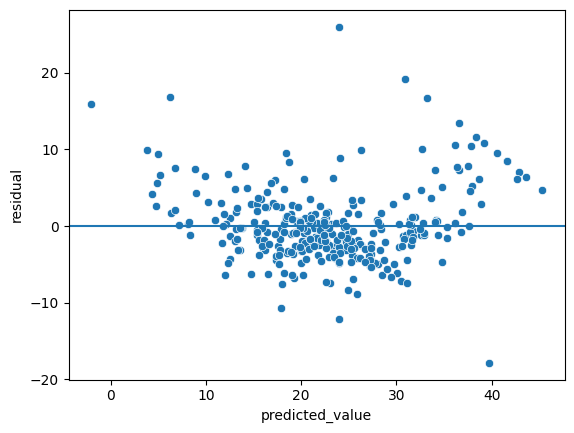

In [32]:
# calculate residuals
residual = y_admit_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

Assumptions:
1. Linear relationship: The horizontal line y=0 does not over-represent all residual points. Because the residuals are closer to the centre only.
2. Variance stable: NO. The variation is close to the middle, but at the ends of the scatter plot there are quite a lot of residuals that widen, especially at the top of y> 0.
3. Independent residuals: OK. There is no noticeable pattern in nearby residuals.

## Model Evaluation

(Ridge)

### Training Error

In [26]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_admit_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_admit_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_admit_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_admit_train, y_predict_train)))

RMSE for training data is 4.8028260197654715
MAE for training data is 3.3800448909187204
MAPE for training data is 0.1692525513485007


** Training **
* RMSE: standard deviation of the residuals of 4.80
* MAE: on average, the predictions made deviated by 3.38.
* MAPE: the average deviated by 16.92%.

### Testing Error

In [ ]:
# prepare prediction result on test data
X_admit_test = feature_boston_test.to_numpy()
y_predict_test = ridge_best.predict(X_admit_test)

# ground truth target
y_admit_test = target_boston_test.to_numpy()
y_admit_test = y_admit_test.reshape(len(y_admit_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_admit_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_admit_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_admit_test, y_predict_test)))

RMSE for testing data is 5.2179497752623485
MAE for testing data is 3.3016052648374403
MAPE for testing data is 0.18022752067268116


** Testing **
* RSME: standard deviation of residuals of 5.21
* MAE: on average, the predictions made deviated by 3.30.
* MAPE: the average deviation is 18.02%.

* Interpretation*

Based on the results of the Training and Testing error check above, this model can be said to be quite good with the MAPE value of both which is still below 20%.  So it can be concluded that this model is not underfitting or overfitting.

## Model Evaluation

(Lasso)

### Training Error

In [36]:
# prepare prediction result on train data
y_predict_train = Lasso_best.predict(X_admit_train)

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_admit_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_admit_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_admit_train, y_predict_train)))

RMSE for training data is 5.1703487487793645
MAE for training data is 3.6858400735776216
MAPE for training data is 0.1749127916176881


** Training **
* RMSE: standard deviation of the residuals of 5.17
* MAE: on average, the predictions made deviated by 3.68.
* MAPE: the average deviated by 17.49%.

### Testing Error

In [38]:
# prepare prediction result on test data
X_admit_test = feature_boston_test.to_numpy()
y_predict_test = Lasso_best.predict(X_admit_test)

# ground truth target
y_admit_test = target_boston_test.to_numpy()
y_admit_test = y_admit_test.reshape(len(y_admit_test),)

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_admit_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_admit_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_admit_test, y_predict_test)))

RMSE for testing data is 5.12551827521382
MAE for testing data is 3.3980635684183924
MAPE for testing data is 0.17856644432964028


** Testing **
* RSME: standard deviation of residuals of 5.12
* MAE: on average, the predictions made deviated by 3.39.
* MAPE: the average deviation is 17.85%.

* Interpretation*

Based on the results of the Training and Testing error check above, this model can be said to be quite good with the MAPE value of both which is still below 20%.  So it can be concluded that this model is not underfitting or overfitting.